Data from Graham et al 2023 [Ecological network structure in response to community assembly processes over evolutionary time](https://doi.org/10.1111/mec.16873)

This is actually only partial data, I believe restricted to only zOTUs that blat hit as spiders (n=541).

The full data from this paper (n=5046 arthropod zOTUS) is in [zenodo](https://zenodo.org/records/7349067)

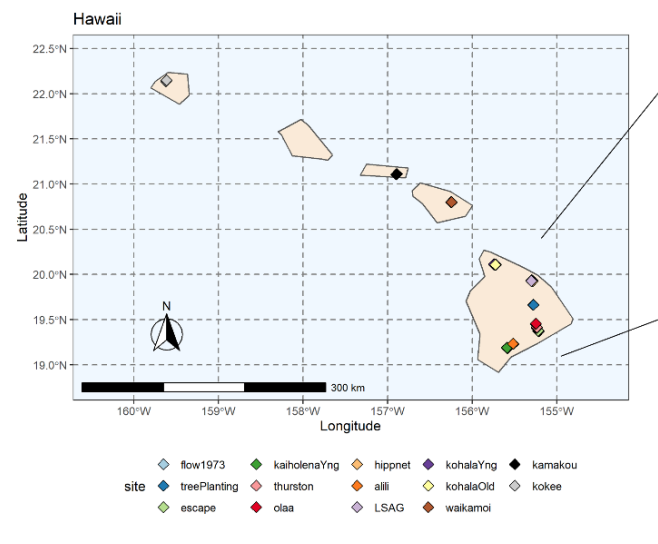

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from scipy.stats import entropy

import sys
sys.path.append('/home/isaac/proj/IMEMEBA-BCI')
import BCI

pd.set_option('display.max_columns', None)

#ipyclient = ipp.Client(cluster_id="iBioGen")
#len(ipyclient)

In [2]:
fastas = glob.glob("fastas/*fasta")

In [3]:
bcis = {}
for fasta in fastas:
    site = fasta.split("/")[1].split(".")[0]
    print(site)
    bcis[site] = BCI.BCI(data=fasta)
    bcis[site]._min_clust_threshold = 70
    bcis[site].run()

kokee
treePlanting
flow1973
kohalaOld
kaiholenaYng
olaa
waikamoi
thurston
alili
kamakou
escape


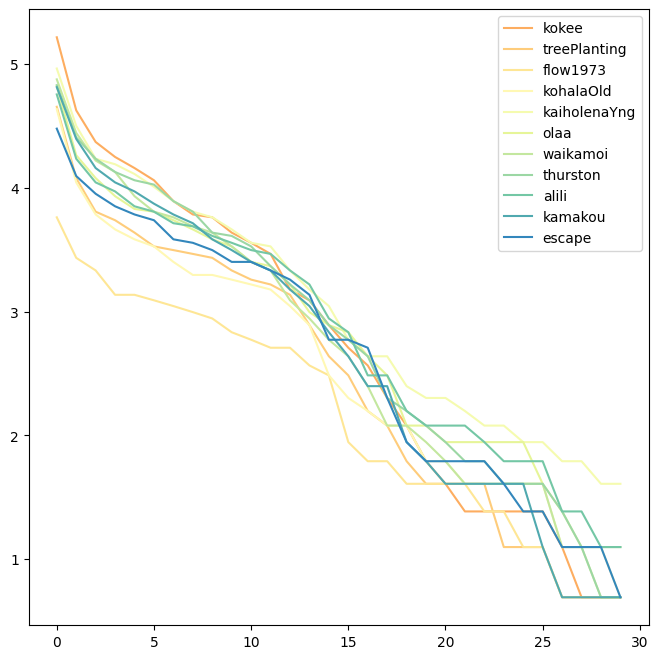

In [4]:
_ = BCI.plot_multi(bcis.values(), log=True, normalize=False)
#bcis["kokee"].samp

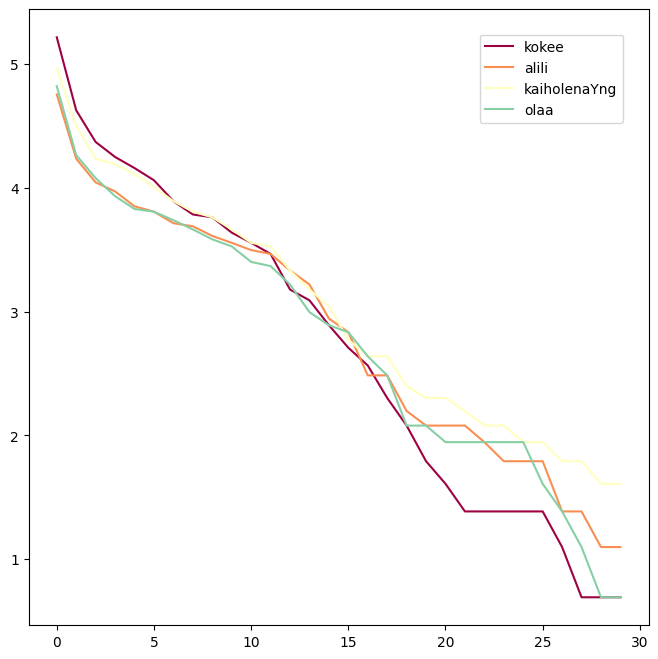

In [6]:
#_ = BCI.plot_multi(bcis.values(), log=True, normalize=False)
sites = ["kokee", "alili", "kaiholenaYng", 'olaa']
_ = BCI.plot_multi([bcis[x] for x in sites], log=True, normalize=False)

In [6]:
Kilauea = ["thurston", "escape", "treePlanting", "flow1973"]
MaunaLoa = ["alili", "olaa", "kaiholenaYng"]
older = ["kokee", "kamakou", "kohalaOld", "waikamoi"]
age_order = ["kokee", "kamakou", "kohalaOld", "waikamoi", "alili", "olaa", "thurston", "escape", "kaiholenaYng", "treePlanting", "flow1973"]

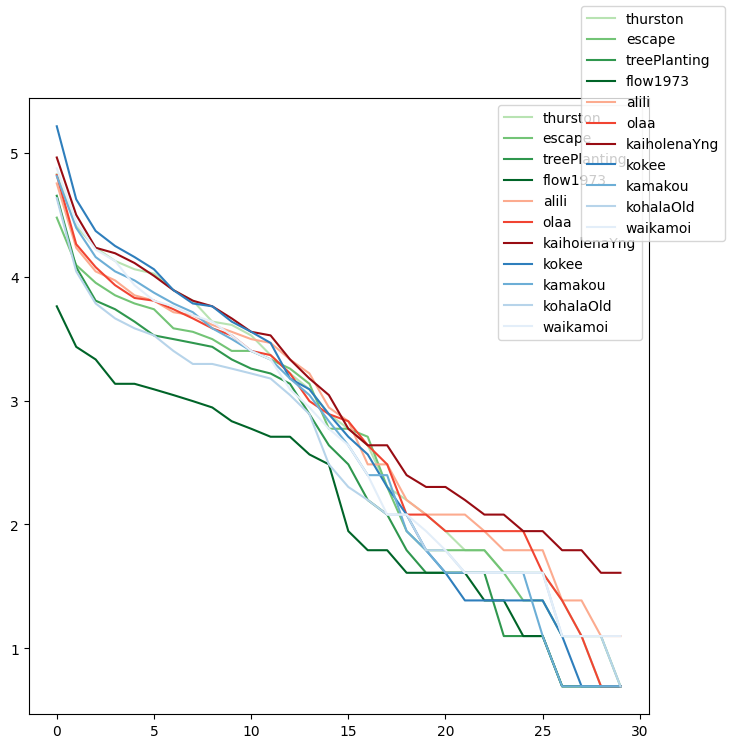

In [7]:
fig, ax = BCI.plot_multi([bcis[x] for x in Kilauea], log=True, normalize=False, cmap="Greens")
fig, ax = BCI.plot_multi([bcis[x] for x in MaunaLoa], log=True, normalize=False, ax=ax, cmap="Reds")
fig, ax = BCI.plot_multi([bcis[x] for x in older], log=True, normalize=False, ax=ax, cmap="Blues_r")
fig.legend()

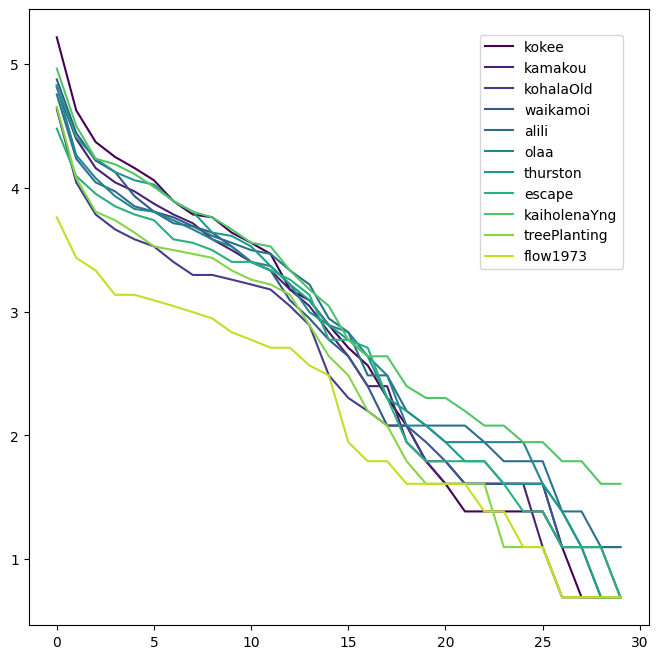

In [9]:
fig, ax = BCI.plot_multi([bcis[x] for x in age_order], log=True, normalize=False, cmap="viridis")

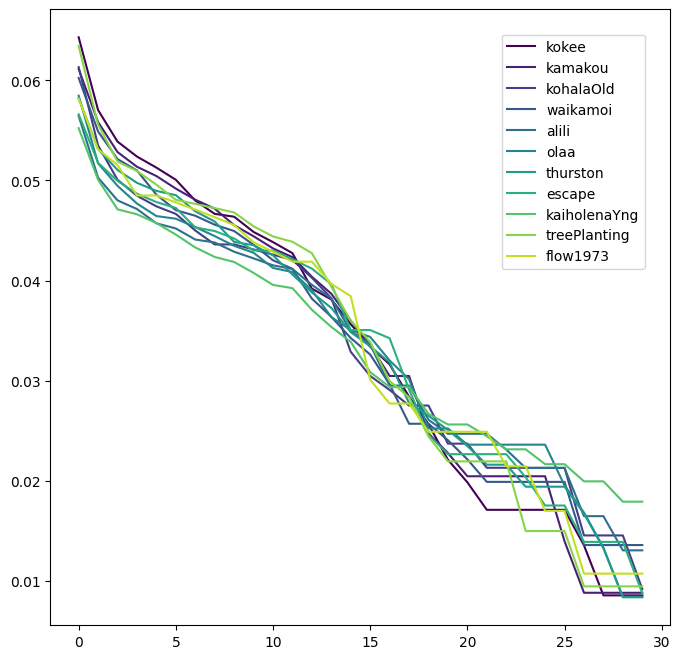

In [16]:
fig, ax = BCI.plot_multi([bcis[x] for x in age_order], log=True, normalize=True, cmap="viridis")

In [33]:
for bci in bcis.values():
    print(bci.samp, "\n", np.exp(entropy(bci.bci)))

kokee 
 14.477656618548128
treePlanting 
 15.713492113334327
flow1973 
 17.243075907814017
kohalaOld 
 15.692177401212628
kaiholenaYng 
 15.90500022817141
olaa 
 16.029657786793752
waikamoi 
 15.219127216681642
thurston 
 15.854491840446814
alili 
 16.402791653892393
kamakou 
 15.56005717549048
escape 
 16.77094222802544


In [ ]:
## Comparing LTT plots
## Establish baseline for different landcover types